## Regresión lineal para predicción de precios de casas

En este ejercicio aprenderemos a usar regresión lineal para predecir el precio de una casa a partir de variables como su tamaño, número de habitaciones, antigüedad y ubicación. Usaremos datos sintéticos (simulados) pero realistas para entrenar un modelo y evaluarlo paso a paso.

### Librerías utilizadas
- `numpy`: operaciones matemáticas y generación de datos aleatorios.
- `pandas`: manejo y exploración de datos en tablas.
- `matplotlib` y `seaborn`: visualización de datos.
- `sklearn`: herramientas para machine learning, incluyendo regresión lineal y métricas de evaluación.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Paso 1: Generación de datos sintéticos

In [ ]:
# Fijamos la semilla para reproducibilidad
np.random.seed(99)
n_casas = 1000

tamaño = np.random.normal(150, 50, n_casas) #La media es 150 y la desviación estandar es 50
habitaciones = np.random.randint(1, 6, n_casas)
edad = np.random.randint(0, 50, n_casas)
ubicacion_score = np.random.normal(7, 2, n_casas)

tamaño = np.clip(tamaño, 50, 300)
ubicacion_score = np.clip(ubicacion_score, 1, 10)

precio = (
    tamaño * 2000 +
    habitaciones * 15000 +
    -edad * 800 +
    ubicacion_score * 10000 +
    np.random.normal(0, 25000, n_casas)
)

precio = np.clip(precio, 50000, None)

datos_casas = pd.DataFrame({
    'tamaño_m2': tamaño,
    'habitaciones': habitaciones,
    'edad_años': edad,
    'ubicacion_score': ubicacion_score,
    'precio': precio
})

datos_casas.head()

,tamaño_m2,habitaciones,edad_años,ubicacion_score,precio
0,142.882058,5,13,8.926148,425389.609638
1,252.861087,2,47,7.462535,580290.791300
2,164.163097,5,31,6.681920,446420.022529
3,216.490599,3,49,4.575097,497399.322226
4,142.268907,3,45,5.780225,342715.199412


### Paso 2: Análisis exploratorio de datos

In [ ]:
print(datos_casas.describe())

         tamaño_m2  habitaciones    edad_años  ubicacion_score         precio
count  1000.000000   1000.000000  1000.000000      1000.000000    1000.000000
mean    151.185380      3.045000    24.833000         6.911239  397653.431998
std      48.157131      1.424431    14.296206         1.854497  101625.456738
min      50.000000      1.000000     0.000000         1.000000  115691.657522
25%     117.620485      2.000000    12.000000         5.633810  328725.682282
50%     151.265031      3.000000    25.000000         6.948511  395440.282045
75%     182.397194      4.000000    37.000000         8.307128  469415.304884
max     300.000000      5.000000    49.000000        10.000000  747265.768208


/tmp/ipython-input-1330766810.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,2].boxplot([datos_casas[datos_casas['habitaciones']==i]['precio'] for i in range(1,6)], labels=range(1,6))


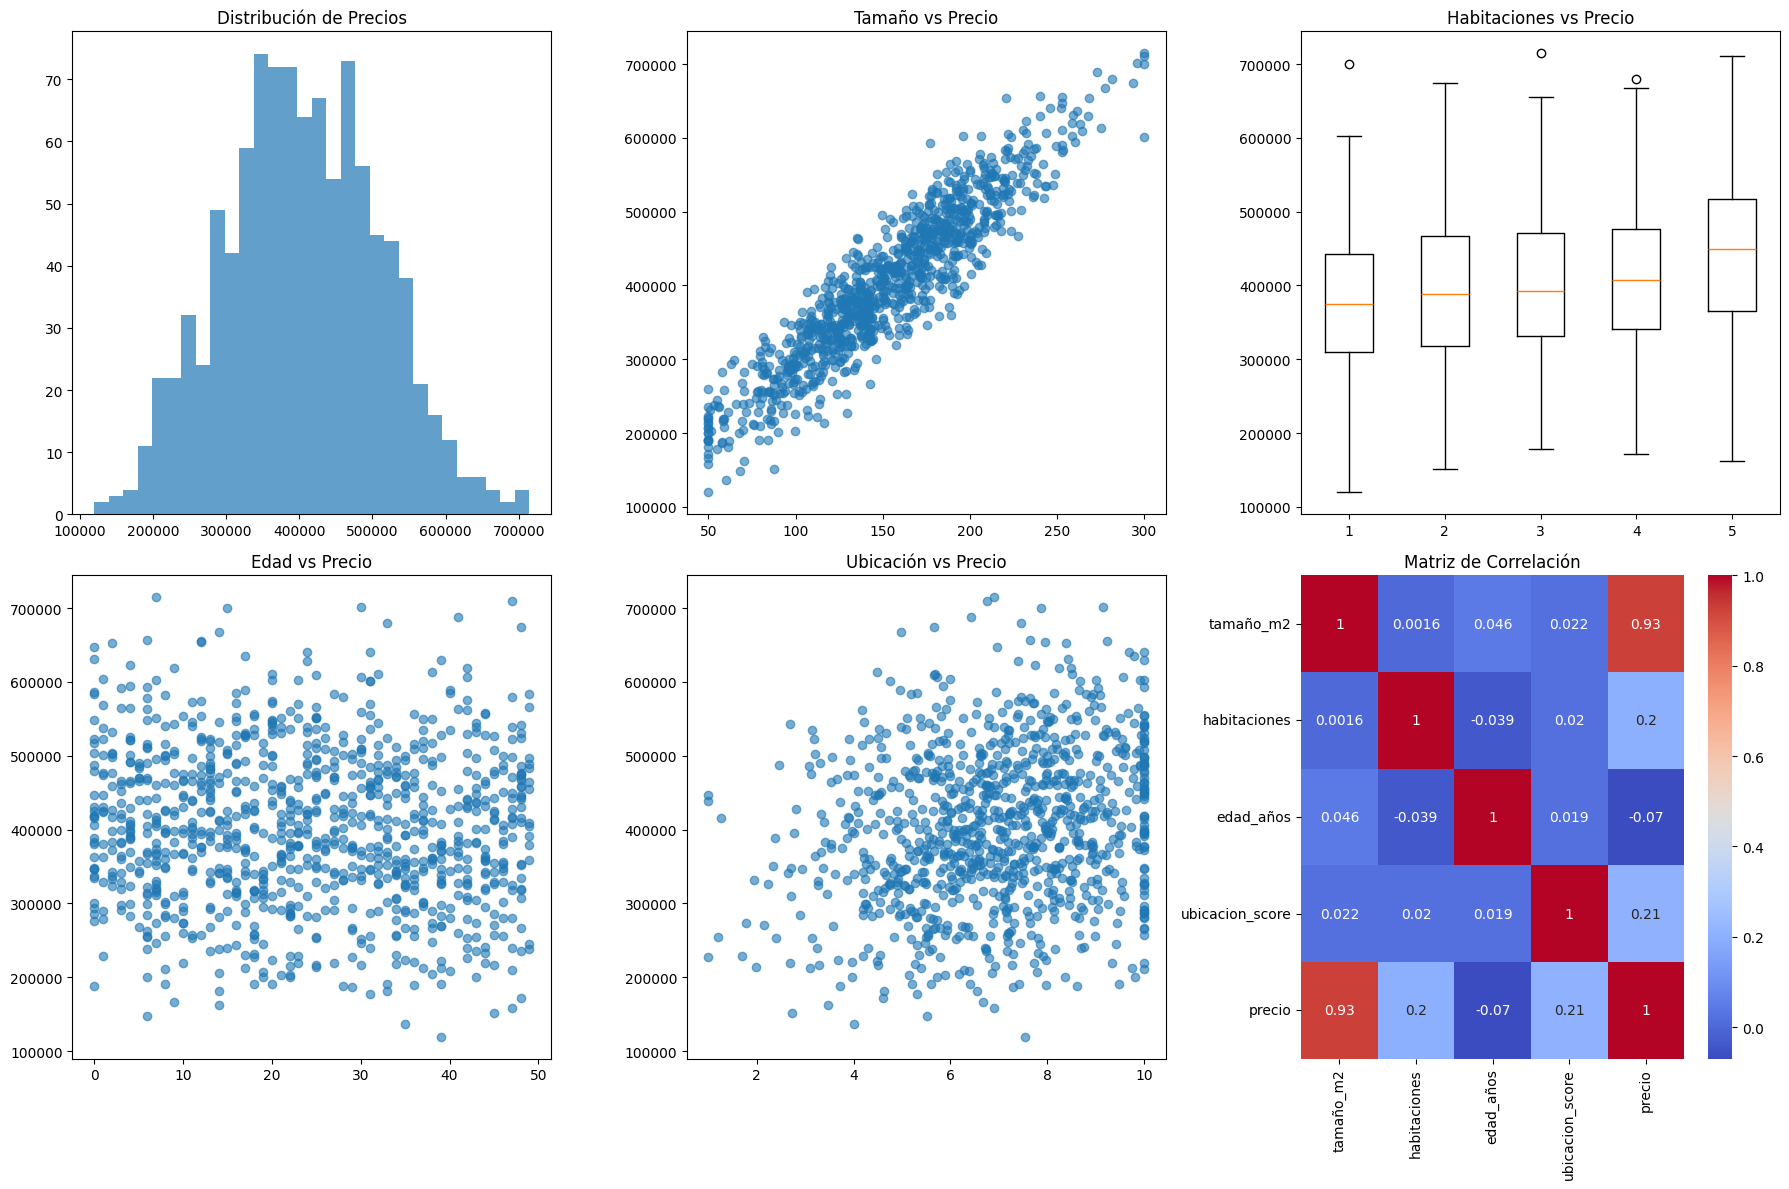

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].hist(datos_casas['precio'], bins=30, alpha=0.7)
axes[0,0].set_title('Distribución de Precios')

axes[0,1].scatter(datos_casas['tamaño_m2'], datos_casas['precio'], alpha=0.6)
axes[0,1].set_title('Tamaño vs Precio')

axes[0,2].boxplot([datos_casas[datos_casas['habitaciones']==i]['precio'] for i in range(1,6)], labels=range(1,6))
axes[0,2].set_title('Habitaciones vs Precio')

axes[1,0].scatter(datos_casas['edad_años'], datos_casas['precio'], alpha=0.6)
axes[1,0].set_title('Edad vs Precio')

axes[1,1].scatter(datos_casas['ubicacion_score'], datos_casas['precio'], alpha=0.6)
axes[1,1].set_title('Ubicación vs Precio')

sns.heatmap(datos_casas.corr(), annot=True, cmap='coolwarm', ax=axes[1,2])
axes[1,2].set_title('Matriz de Correlación')

plt.tight_layout()
plt.show()

### Paso 3: Preparar los datos para regresión

In [ ]:
X = datos_casas[['tamaño_m2', 'habitaciones', 'edad_años', 'ubicacion_score']]
y = datos_casas['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 4), (200, 4))

### Paso 4: Entrenar modelo de regresión lineal

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
for feature, coef in zip(X.columns, modelo.coef_):
    print(f"{feature}: ${coef:,.2f}")
print(f"Intercepto: ${modelo.intercept_:,.2f}")

tamaño_m2: $1,953.62
habitaciones: $14,507.77
edad_años: $-786.47
ubicacion_score: $10,327.96
Intercepto: $6,097.15


### Paso 5: Evaluación del modelo

In [ ]:
y_pred = modelo.predict(X_test)

print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.0f}")

R²: 0.935
MSE: 674,273,158


### Paso 6: Visualización de predicciones y residuos

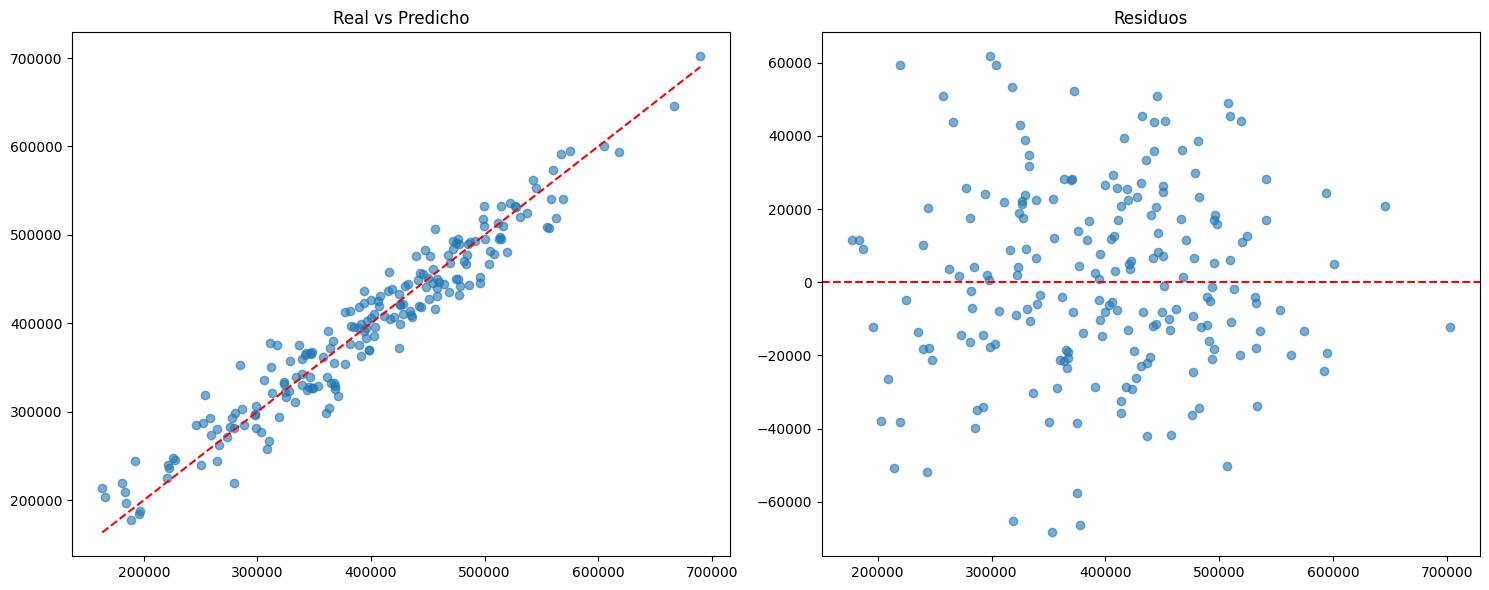

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(y_test, y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title('Real vs Predicho')

residuos = y_test - y_pred
axes[1].scatter(y_pred, residuos, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Residuos')

plt.tight_layout()
plt.show()

## ¿Cómo deben comportarse los residuos?
Aquí van los puntos clave:
*  **Distribución aleatoria (sin patrón):**

 Si graficas los residuos contra los valores predichos, deberían verse como una nube dispersa.
 Si ves una forma clara (curvas, conos, ondas), significa que hay patrones no explicados por el modelo → quizá no es una relación lineal.


*  **Media cercana a cero:**

 En promedio, los residuos deberían sumar (más o menos) cero.
 Si están todos por encima o debajo, tu modelo tiene sesgo.


*  **Varianza constante (homocedasticidad):**

 Los residuos deben tener varianza estable en todos los niveles de predicción.
 Si aumentan o disminuyen al avanzar en el eje X (como un cono), eso indica heterocedasticidad, y el modelo no está ajustando bien.


*  **Distribución normal (para propósitos estadísticos):**

 Idealmente, los residuos deberían seguir una distribución normal (especialmente si vas a calcular intervalos de confianza o hacer inferencia).
 Puedes verificarlo con un histograma